# Boston House Prices-Advanced Regression Techniques

![housing_Image](https://storage.googleapis.com/kaggle-datasets-images/1381830/2292500/6f661f7fe22683cb30a0a3e4fd23cfe8/dataset-cover.jpg)

<h1 style=color:blue;text-align:center>Boston House Prices-Advanced Regression Techniques</h1>
<center><img src="https://storage.googleapis.com/kaggle-datasets-images/1381830/2292500/6f661f7fe22683cb30a0a3e4fd23cfe8/dataset-cover.jpg" height=300 width=500></center>


## Importing Libraries

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,RandomizedSearchCV,GridSearchCV

from sklearn.linear_model import (Ridge,Lasso,ElasticNetCV,BayesianRidge,GammaRegressor,Hinge,
                                Huber,HuberRegressor,Lars,LarsCV,ModifiedHuber,TweedieRegressor,
                                QuantileRegressor)

import warnings
warnings.filterwarnings('ignore')


## Loading Data

In [2]:
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Data Summary
<h3>Attribute Information</h3>

<p>Input features in order:<br>
1) CRIM: per capita crime rate by town<br>
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.<br>
3) INDUS: proportion of non-retail business acres per town<br>
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)(D)<br>
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]<br>
6) RM: average number of rooms per dwelling<br>
7) AGE: proportion of owner-occupied units built prior to 1940<br>
8) DIS: weighted distances to five Boston employment centres<br>
9) RAD: index of accessibility to radial highways<br>
10) TAX: full-value property-tax rate per $10,000 [$/10k]<br>
11) PTRATIO: pupil-teacher ratio by town<br>
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
13) LSTAT: % lower status of the population</p>

<p><span style = color:#faebd7;background-color:red;padding:5px;>Output variable:</span><br>
1) MEDV: Median value of owner-occupied homes in $1000's [k$]</p>



In [3]:
rows,cols = data.shape

print(f'Shape:\nNo. of Columns: {cols}\nNo. of Rows: {cols}')

columns = data.columns

Shape:
No. of Columns: 14
No. of Rows: 14


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

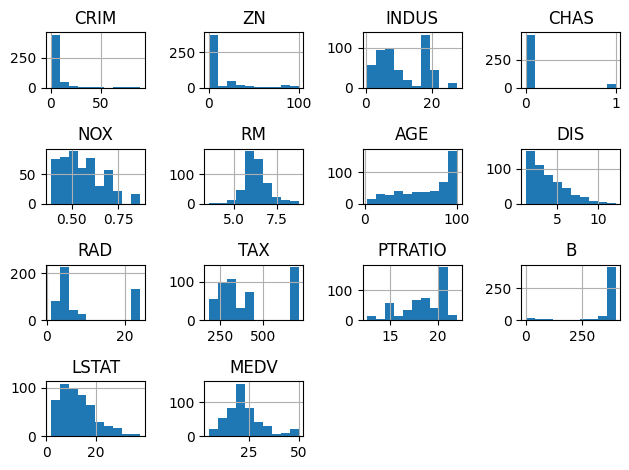

In [7]:
data.hist()

plt.tight_layout()
plt.show()

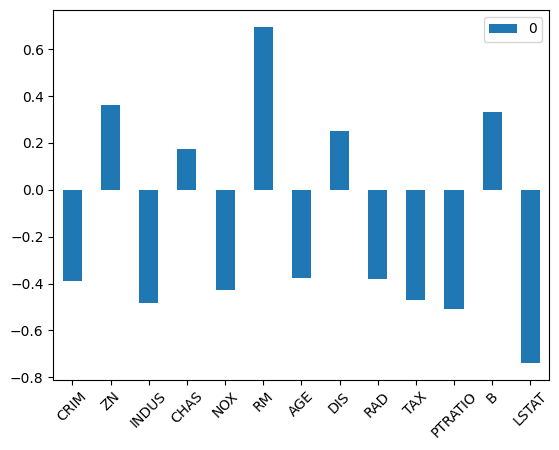

In [8]:
X,Y= data.drop('MEDV',axis=1),data.MEDV

corr = pd.DataFrame(X.corrwith(Y))
# print(corr.T)
corr.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()


In [9]:
abs(corr).sort_values(0,ascending=False)

,0
LSTAT,0.737663
RM,0.695360
PTRATIO,0.507787
INDUS,0.483725
TAX,0.468536
NOX,0.427321
CRIM,0.388305
RAD,0.381626
AGE,0.376955
ZN,0.360445


## Base Model

In [10]:
Y.name+"~" + "+".join(X.columns)

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [11]:
from statsmodels.formula.api import ols

model = ols('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          6.72e-135
Time:                        19:26:56   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
irr = round(model.pvalues,2)[round(model.pvalues,2) > 0.05]
irr

INDUS    0.74
AGE      0.96
dtype: float64

## Scaled Model

In [88]:
X,Y = data.drop('MEDV',axis=1),data.MEDV
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [107]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=.20)


In [108]:
ridge = Ridge(alpha=10, random_state=1, solver='lsqr')

In [109]:


ridge.fit(x_train,y_train)

pred = ridge.predict(x_test)

r2_score(y_test,pred)

0.7161755484784048

# EDA

In [17]:
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


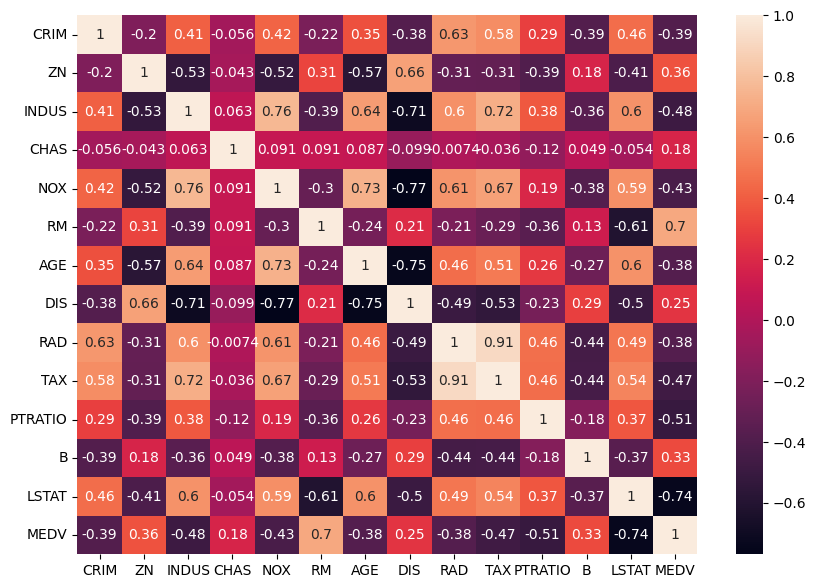

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [26]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [42]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# variance_inflation_factor(data,1)
# help(variance_inflation_factor)

In [39]:
vifs = {data.columns[i]:variance_inflation_factor(data,i) for i in range(len(data.columns))}
pd.DataFrame(vifs,index=['VIF']).T.sort_values('VIF',ascending=False)

,VIF
RM,136.101743
PTRATIO,87.227233
NOX,74.004269
TAX,61.939713
MEDV,24.503206
AGE,21.398863
B,21.351015
DIS,15.430455
RAD,15.369980
INDUS,14.485874


# Regularization

In [52]:
X,Y = data.drop('MEDV',axis=1),data.MEDV

## Ridge

In [65]:
params = {'alpha':[.1,.5,1.0,1.5,3,5,10],
'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs'],
'random_state':[1,10,20]}

In [110]:

rs = GridSearchCV(Ridge(),params,cv=10,verbose=4,return_train_score=True)
# help(RandomizedSearchCV)
est = rs.fit(x_train,y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
[CV 1/10] END alpha=0.1, random_state=1, solver=auto;, score=(train=0.758, test=0.605) total time=   0.0s
[CV 2/10] END alpha=0.1, random_state=1, solver=auto;, score=(train=0.743, test=0.738) total time=   0.0s
[CV 3/10] END alpha=0.1, random_state=1, solver=auto;, score=(train=0.749, test=0.678) total time=   0.0s
[CV 4/10] END alpha=0.1, random_state=1, solver=auto;, score=(train=0.750, test=0.642) total time=   0.0s
[CV 5/10] END alpha=0.1, random_state=1, solver=auto;, score=(train=0.755, test=0.648) total time=   0.0s
[CV 6/10] END alpha=0.1, random_state=1, solver=auto;, score=(train=0.744, test=0.712) total time=   0.0s
[CV 7/10] END alpha=0.1, random_state=1, solver=auto;, score=(train=0.742, test=0.735) total time=   0.0s
[CV 8/10] END alpha=0.1, random_state=1, solver=auto;, score=(train=0.727, test=0.840) total time=   0.0s
[CV 9/10] END alpha=0.1, random_state=1, solver=auto;, score=(train=0.744, test=0.729) 

In [111]:
est.best_params_

{'alpha': 5, 'random_state': 20, 'solver': 'sag'}

In [112]:
est.best_score_

0.712021365125981

In [113]:
model = est.best_estimator_
pred  = model.predict(x_test)
r2_score(y_test,pred)

0.7183325545288912

In [114]:
import joblib

joblib.dump(model,'adv_reg.pickle')

['adv_reg.pickle']

In [115]:
(joblib.load('adv_reg.pickle'))

Ridge(alpha=5, random_state=20, solver='sag')

## Lasso

In [105]:
params = {'alpha':[0.1,.001,.5,1.0,1.5,2.0,10.0,,20.0],
          'max_iter':[1000,2000,5000,500],
          'selection' : {'cyclic', 'random'},
         }
# help(Lasso)

SyntaxError: invalid syntax (2964311581.py, line 1)

## QR

In [53]:
qr = QuantileRegressor()
qr.fit(X,Y)

QuantileRegressor()

In [57]:
from sklearn.metrics import r2_score
pred = qr.predict(X)
r2_score(Y,pred)


0.3743024728893243

## a
